In [373]:
import requests
import pandas
import math
import datetime
from collections import Counter
%matplotlib inline  

In [374]:
URL = "https://vc.ru/helper/news?count=%d&offset=%d"

In [375]:
resp = requests.get(URL % (10, 0))
json = resp.json()

In [376]:
def load_news(offset):
    print("Loading 20 last news starting from %d" % offset)
    resp = requests.get(URL % (20, offset))
    json = resp.json()
    return json['items']

In [377]:
offsets = list(range(0, 1000, 20))

In [378]:
news = []
for offset in offsets:
    news += load_news(offset)
    

Loading 20 last news starting from 0
Loading 20 last news starting from 20
Loading 20 last news starting from 40
Loading 20 last news starting from 60
Loading 20 last news starting from 80
Loading 20 last news starting from 100
Loading 20 last news starting from 120
Loading 20 last news starting from 140
Loading 20 last news starting from 160
Loading 20 last news starting from 180
Loading 20 last news starting from 200
Loading 20 last news starting from 220
Loading 20 last news starting from 240
Loading 20 last news starting from 260
Loading 20 last news starting from 280
Loading 20 last news starting from 300
Loading 20 last news starting from 320
Loading 20 last news starting from 340
Loading 20 last news starting from 360
Loading 20 last news starting from 380
Loading 20 last news starting from 400
Loading 20 last news starting from 420
Loading 20 last news starting from 440
Loading 20 last news starting from 460
Loading 20 last news starting from 480
Loading 20 last news starting f

In [379]:
df = pandas.DataFrame(news)

In [380]:
df

,comments_count,date,hits_beauty,id,picture_big_url,picture_big_url_original,picture_url,picture_url_original,title,url
0,0,1485164018,315,21474,https://static46.siliconrus.cmtt.ru/paper-prev...,https://static46.siliconrus.cmtt.ru/paper-prev...,https://static44.siliconrus.cmtt.ru/paper-prev...,https://static44.siliconrus.cmtt.ru/paper-prev...,Акционеры «Мегафона» одобрили покупку контроля...,https://vc.ru/n/mega-mrg-agree
1,8,1485163621,345,21472,https://static48.siliconrus.cmtt.ru/paper-prev...,https://static48.siliconrus.cmtt.ru/paper-prev...,https://static49.siliconrus.cmtt.ru/paper-prev...,https://static49.siliconrus.cmtt.ru/paper-prev...,Вице-премьер Шувалов предложил «Первому каналу...,https://vc.ru/n/business-voice
2,4,1485160627,930,21471,https://static41.siliconrus.cmtt.ru/paper-prev...,https://static41.siliconrus.cmtt.ru/paper-prev...,https://static49.siliconrus.cmtt.ru/paper-prev...,https://static49.siliconrus.cmtt.ru/paper-prev...,Выходец из Google Хьюго Барра покинет Xiaomi п...,https://vc.ru/n/barra-leaves-xiaomi
3,4,1485157828,554,21470,https://static43.siliconrus.cmtt.ru/paper-prev...,https://static43.siliconrus.cmtt.ru/paper-prev...,https://static44.siliconrus.cmtt.ru/paper-prev...,https://static44.siliconrus.cmtt.ru/paper-prev...,«Коммерсантъ» рассказал о трудностях российски...,https://vc.ru/n/banks-taxes-trouble
4,2,1485155319,409,21467,https://static43.siliconrus.cmtt.ru/paper-prev...,https://static43.siliconrus.cmtt.ru/paper-prev...,https://static47.siliconrus.cmtt.ru/paper-prev...,https://static47.siliconrus.cmtt.ru/paper-prev...,WSJ узнала о расследовании властями США крупны...,https://vc.ru/n/sec-yahoo
5,8,1485151218,2 554,21465,https://static43.siliconrus.cmtt.ru/paper-prev...,https://static43.siliconrus.cmtt.ru/paper-prev...,https://static41.siliconrus.cmtt.ru/paper-prev...,https://static41.siliconrus.cmtt.ru/paper-prev...,Российский сервис «Рево» для оплаты товаров в ...,https://vc.ru/n/baring-revo-invest
6,7,1485144253,2 851,21464,https://static48.siliconrus.cmtt.ru/paper-prev...,https://static48.siliconrus.cmtt.ru/paper-prev...,https://static49.siliconrus.cmtt.ru/paper-prev...,https://static49.siliconrus.cmtt.ru/paper-prev...,Samsung назвала ошибки проектирования аккумуля...,https://vc.ru/n/note-7-fire-official
7,20,1484999275,3 879,21455,https://static42.siliconrus.cmtt.ru/paper-prev...,https://static42.siliconrus.cmtt.ru/paper-prev...,https://static42.siliconrus.cmtt.ru/paper-prev...,https://static42.siliconrus.cmtt.ru/paper-prev...,BI: Microsoft решила сократить ещё 700 сотрудн...,https://vc.ru/n/microsoft-cuts-report
8,13,1484994303,8 251,21454,https://static44.siliconrus.cmtt.ru/paper-prev...,https://static44.siliconrus.cmtt.ru/paper-prev...,https://static42.siliconrus.cmtt.ru/paper-prev...,https://static42.siliconrus.cmtt.ru/paper-prev...,Apple обвинила в монополизме производителя чип...,https://vc.ru/n/apple-qualcomm
9,26,1484929578,5 883,21451,https://static47.siliconrus.cmtt.ru/paper-prev...,https://static47.siliconrus.cmtt.ru/paper-prev...,https://static42.siliconrus.cmtt.ru/paper-prev...,https://static42.siliconrus.cmtt.ru/paper-prev...,Консалтинговая компания Accenture автоматизиро...,https://vc.ru/n/accenture-17k


In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
comments_count              1000 non-null int64
date                        1000 non-null int64
hits_beauty                 1000 non-null object
id                          1000 non-null int64
picture_big_url             1000 non-null object
picture_big_url_original    1000 non-null object
picture_url                 1000 non-null object
picture_url_original        1000 non-null object
title                       1000 non-null object
url                         1000 non-null object
dtypes: int64(3), object(7)
memory usage: 78.2+ KB


In [382]:
filtered = map(lambda x: int(x.replace(' ', '')), df['hits_beauty'])
df['hits'] = list(filtered)

In [383]:
# Load 1001 news
last_news = load_news(1000)
date1001 = last_news[0]['date']
date_diff11000 = df['date'].min() - date1001

Loading 20 last news starting from 1000


In [384]:
# date_diff stores diffrence in seconds
date_diff = list(map(lambda x: abs(x), df['date'].diff()))
date_diff.pop(0)
date_diff.extend([date_diff11000])
df['date_diff'] = date_diff

In [385]:
df['day'] = list(map(lambda t: datetime.datetime.fromtimestamp(t).weekday(), df['date']))

In [386]:
df.describe()

,comments_count,date,id,hits,date_diff,day
count,1000.000000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000
mean,17.458000,1.480837e+09,20416.745000,4227.85200,8188.468000,2.111000
std,27.544926,2.310030e+06,612.227983,5755.02513,17208.692518,1.526765
min,0.000000,1.476981e+09,18347.000000,315.00000,8.000000,0.000000
25%,4.000000,1.478873e+09,19900.250000,1661.25000,1910.250000,1.000000
50%,10.000000,1.480613e+09,20403.500000,2738.00000,3230.000000,2.000000
75%,22.000000,1.482483e+09,20933.250000,4767.25000,5402.000000,3.000000
max,540.000000,1.485164e+09,21474.000000,119844.00000,164830.000000,6.000000


В `date_diff` разница в секундах между публикацие новостей. 

В среднем новости публикуются каждые 2 часа 14 минут. 

Максимальный период молчания составил 1 день, 21 час, 47 минут, 10 сек. 

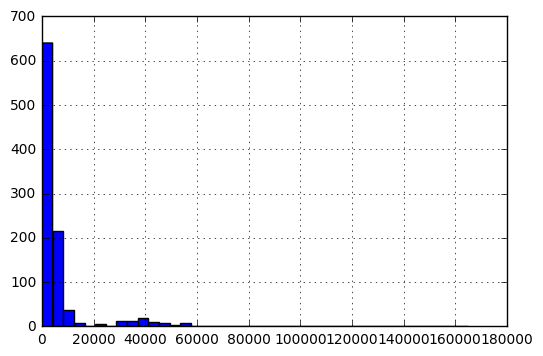

In [387]:
df['date_diff'].hist(bins=40)

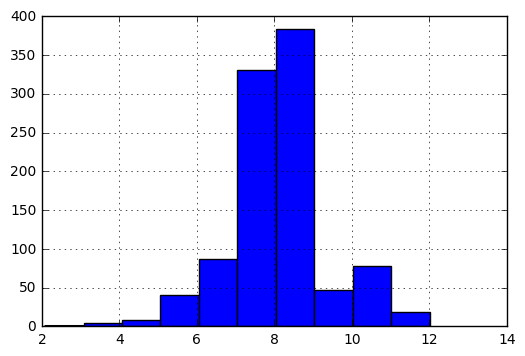

In [388]:
# logarithmic scale
pandas.Series(list(map(math.log, df['date_diff']))).hist()

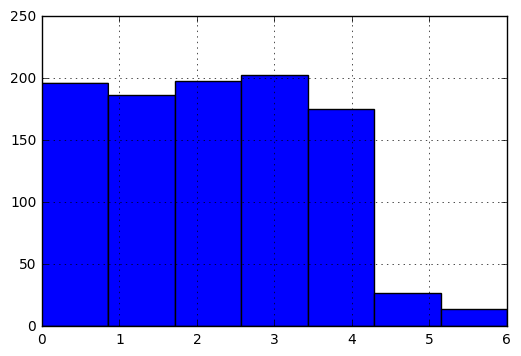

In [389]:
df['day'].hist(bins=7)

In [390]:
words = ''.join(df['title']).split(' ')
words_count = Counter(words)
words_list = words_count.items()

In [391]:
word_quanity = list(words_count.items())

In [392]:
wordsDf = pandas.DataFrame(word_quanity)
wordsDf.columns = ['word', 'quanity']
wordsDf

,word,quanity
0,Акционеры,2
1,«Мегафона»,4
2,одобрили,2
3,покупку,5
4,контроля,1
5,в,395
6,Mail.Ru,11
7,Group,23
8,за,111
9,$740,2


In [393]:
def topNWords(frame, N=10, minimal_size=3):
    return frame[list(map(lambda x: len(x) > minimal_size, frame['word']))].sort_values(by=['quanity'], ascending=False).head(N)

In [394]:
topNWords(wordsDf, 10, 3)

,word,quanity
348,из-за,59
29,после,52
56,сервис,50
217,запустил,44
385,2016,43
256,России,40
374,млрд,38
205,рублей,37
176,через,29
212,запустила,28


In [395]:
topNWords(wordsDf, 10, 5)

,word,quanity
56,сервис,50
217,запустил,44
256,России,40
205,рублей,37
212,запустила,28
598,неделю:,23
699,рекламы,22
24,Google,22
599,Новости,21
54,пользователей,21


In [396]:
topNWords(wordsDf, 10, 7)

,word,quanity
217,запустил,44
212,запустила,28
54,пользователей,21
274,российского,20
1024,компании,20
412,представила,20
392,тестирование,16
443,запустили,16
40,российских,15
179,запустит,14


In [397]:
topNWords(wordsDf, 10, 19)

,word,quanity
976,компанию-разработчика,2
4066,рублей«Коммерсантъ»:,2
3420,КостыгинаМинкомсвязи,1
3427,ГенпрокуратурыМосгорсуд,1
3449,b2b-бизнесаАкционеры,1
3459,блокировкиКиностудия,1
3511,FacioMetricsПетербургский,1
3523,годаИнтернет-магазин,1
3538,UniversumРоскомнадзор,1
3560,сообществМинпромторг,1


0       4972.0
1      64725.0
2       3950.0
3       6126.0
4       7576.0
5       3660.0
6        845.0
7       1627.0
8       1678.0
9       2579.0
10      2857.0
11      2832.0
12      5010.0
13     41735.0
14      4438.0
15      5408.0
16      3001.0
17      3174.0
18      2079.0
19      1764.0
20      4747.0
21      3764.0
22      4129.0
23      1462.0
24      1794.0
25      2452.0
26      2582.0
27     41541.0
28      1151.0
29      1857.0
        ...   
970     5044.0
971    60756.0
972     6718.0
973     1941.0
974      562.0
975     4589.0
976     3131.0
977     1065.0
978      579.0
979     6680.0
980     3812.0
981     4249.0
982     1184.0
983     2587.0
984      975.0
985     3524.0
986     2817.0
987     3721.0
988    30215.0
989     5129.0
990     7190.0
991     5423.0
992     5633.0
993     1716.0
994       43.0
995      274.0
996      928.0
997     7836.0
998      525.0
999   -11322.0
Name: date_diff, dtype: float64

In [369]:
map(math.log, df['date_diff'])

In [371]:
list(map(math.log, df['date_diff']))

ValueError: math domain error

-11322.0